# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [171]:
df = pd.read_csv('../data/states_edu.csv')


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [172]:
# Drops any rows where grade 4 reading, our point of interest, does not have data
df.dropna(subset=['AVG_READING_4_SCORE'], inplace=True)
df.isna().sum()

# We will also be interested in how revenue and expenditure relate both to each other and to this score
df.dropna(subset=['TOTAL_REVENUE'], inplace=True)
df.dropna(subset=['TOTAL_EXPENDITURE'], inplace=True)
df.dropna(subset=['OTHER_EXPENDITURE'], inplace=True)
df.isna().sum()

# Now there are no missing values in places that are of concern to us (revenue, expenditure, 4th grade reading scores)




PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                            0
TOTAL_REVENUE                     0
FEDERAL_REVENUE                   0
STATE_REVENUE                     0
LOCAL_REVENUE                     0
TOTAL_EXPENDITURE                 0
INSTRUCTION_EXPENDITURE           0
SUPPORT_SERVICES_EXPENDITURE      0
OTHER_EXPENDITURE                 0
CAPITAL_OUTLAY_EXPENDITURE        0
GRADES_PK_G                       4
GRADES_KG_G                       0
GRADES_4_G                        0
GRADES_8_G                        0
GRADES_12_G                       0
GRADES_1_8_G                     40
GRADES_9_12_G                    40
GRADES_ALL_G                      0
AVG_MATH_4_SCORE                124
AVG_MATH_8_SCORE                124
AVG_READING_4_SCORE               0
AVG_READING_8_SCORE              45
dtype: int64

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 4 Reading*

How many years of data are logged in our dataset? 

In [173]:
print(len(df["YEAR"].unique()))


10


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [174]:

avg_by_state = df.groupby("STATE")["AVG_READING_4_SCORE"].mean()
print(avg_by_state["MICHIGAN"], "vs", avg_by_state["OHIO"])
if avg_by_state["MICHIGAN"] > avg_by_state["OHIO"]:
    print("Over all chosen years, Michigan had a higher average average 4th grade reading score than Ohio.")
elif avg_by_state["MICHIGAN"] < avg_by_state["OHIO"]:
    print("Over all chosen years, Ohio had a higher average average 4th grade reading score than Michigan.")
else:
    print("Tie!!!")

218.0 vs 223.875
Over all chosen years, Ohio had a higher average average 4th grade reading score than Michigan.


Find the average for your chosen test across all states in 2019

In [175]:

if "2019" in df.loc[:,["YEAR"]]:
    state_avgs_by_year = df.groupby("YEAR")["AVG_READING_4_SCORE"].mean()
    print(state_avgs_by_year["2019"])
else:
    print("2019 is not represented in our data field for this test variable.")


2019 is not represented in our data field for this test variable.


For each state, find a maximum value for your chosen test score

In [176]:
max_avg_by_state = df.groupby("STATE")["AVG_READING_4_SCORE"].max()
print(max_avg_by_state)

STATE
ALABAMA                 220.0
ALASKA                  214.0
ARIZONA                 215.0
ARKANSAS                219.0
CALIFORNIA              213.0
COLORADO                227.0
CONNECTICUT             230.0
DELAWARE                226.0
DISTRICT_OF_COLUMBIA    212.0
FLORIDA                 227.0
GEORGIA                 222.0
HAWAII                  215.0
IDAHO                   223.0
ILLINOIS                222.0
INDIANA                 227.0
IOWA                    225.0
KANSAS                  225.0
KENTUCKY                228.0
LOUISIANA               216.0
MAINE                   228.0
MARYLAND                232.0
MASSACHUSETTS           237.0
MICHIGAN                220.0
MINNESOTA               227.0
MISSISSIPPI             214.0
MISSOURI                224.0
MONTANA                 227.0
NEBRASKA                227.0
NEVADA                  214.0
NEW_HAMPSHIRE           232.0
NEW_JERSEY              231.0
NEW_MEXICO              212.0
NEW_YORK                224.0
NORT

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [177]:
df['AVG_READING_4_SCORE_VS_INSTRUCTION_EXPENDITURE'] = df['AVG_READING_4_SCORE'] / df['INSTRUCTION_EXPENDITURE']

Feature engineering justification: **I chose to compare instruction expenditure against average 4th grade reading score to test the seemingly intuitive assumption that more money leads to better instruction, which leads to higher performances on tests. Therefore, we expect that this marker will remain constant or get bigger with larger amounts of instruction expenditure.**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, 'Average 4th Grade Reading Score')

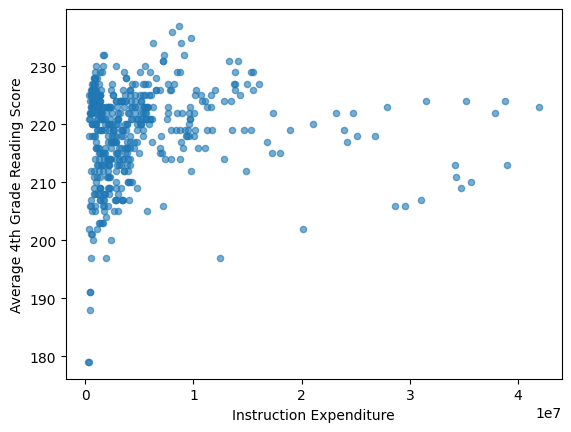

In [178]:
df.plot.scatter(x = 'INSTRUCTION_EXPENDITURE', y = 'AVG_READING_4_SCORE', alpha = 0.6)
plt.xlabel('Instruction Expenditure')
plt.ylabel('Average 4th Grade Reading Score')

# Interesting! It doesn't seem like there is even a weak correlation involved here- rather, the data implies that we just don't have many points to represent high instruction expenditure compared to low.

**Average 4th Grade Reading Score vs. Increased Instruction Expenditure**

**Visualization 2**

Text(0.5, 0, 'Year')

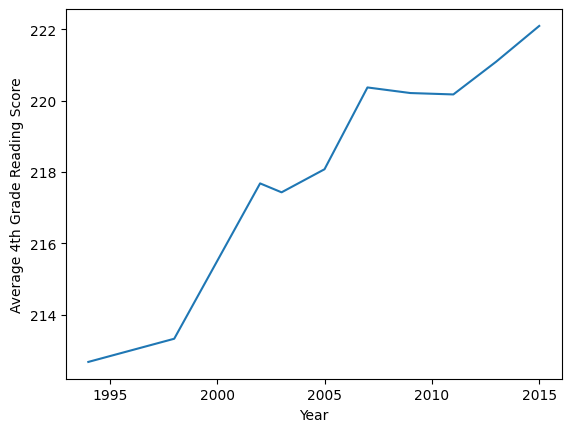

In [179]:
df.groupby('YEAR')['AVG_READING_4_SCORE'].mean().plot()
plt.ylabel('Average 4th Grade Reading Score')
plt.xlabel('Year')

# We see a much stronger correlation here, of scores rising as time goes on and the education system (presumably) develops

**Average 4th grade reading score over time (years)**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
X = df[['GRADES_4_G','AVG_MATH_4_SCORE','AVG_READING_8_SCORE']].dropna()
y = df.loc[X.index]['AVG_READING_4_SCORE']
y.fillna(y.median(), inplace=True)

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# changed from 42 because I'd like consistent results

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [183]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [184]:
# create your model here
model = LinearRegression() 

In [185]:
model.fit(X_train, y_train)

LinearRegression()

In [186]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [187]:
modelScore = model.score(X_test,y_test)
print(modelScore)

meanError = np.mean(model.predict(X_test)-y_test)
print(meanError)

RsquaredError = np.mean((model.predict(X_test)-y_test)**2)**0.5
print(RsquaredError)

0.8196253481180339
-0.15743149217956923
2.9428523993396016


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

In [189]:
col_name = 'AVG_READING_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Total Expenditure')
plt.title("Model Behavior On Training Set")

KeyError: 'AVG_MATH_8_SCORE'

<Figure size 1200x600 with 0 Axes>

In [110]:
col_name = 'AVG_READING_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")
    
plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Total Expenditure')
plt.title("Model Behavior on Testing Set")